<a href="https://colab.research.google.com/github/RahulBari07/Deep-Learning/blob/main/Multiple_Classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number of classes is more than 2 then it

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the train dataset



In [3]:
import pandas as pd
url1=  "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv"
df = pd.read_csv(url1)
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df['price_range'].unique()


array([1, 2, 3, 0])

# Price Rnage


0 - Cheap

1 - Moderate

2 - High

3 - Very Expensive

# 4 classes to predict in above dataframe

## Step 3: Seperate X and Y (price_range)

In [5]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]


In [6]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [7]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


# Step-4: Perfom Preprocessing on X

In [8]:
X.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn .preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [14]:
X.shape

(2000, 20)

# Step 5: apply train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [16]:
xtrain.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [19]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [20]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [21]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [22]:
xtrain.shape

(1600, 20)

In [23]:
xtest.shape

(400, 20)

# This is applicable to multiclass classification only,get one hot encoding for target features

In [24]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [25]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [26]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [27]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [28]:
ytrain_cat.shape[1]

4

# Step 6 : Build the neural network

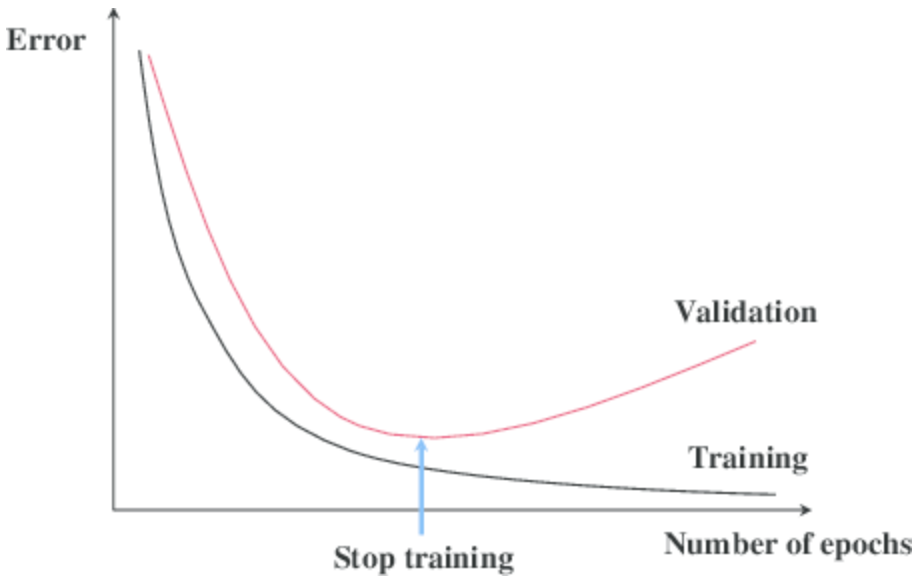

In [29]:
ytrain_cat.shape[1]

4

In [32]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [91]:
# Initialize model
model = Sequential()
# create a Input Layer
model.add(Input(shape=(xtrain.shape[1],)))
# Create dense layer 1
model.add(Dense(64, activation='relu'))
#Add dropout layer
model.add(Dropout(0.2))

# Create Dense Layer 2
model.add(Dense(32,activation='relu'))
#add dropout layer
model.add(Dropout(0.1))

# output Layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))


In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1344      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
# add early stopping
es = EarlyStopping(monitor='val_loss',patience=15)

In [41]:
hist = model.fit(
    xtrain,
    ytrain_cat,
    validation_split=0.2,
    epochs=200,
    callbacks=[es]
)

Epoch 1/200
40/40 [==============================] - 1s 9ms/step - loss: 1.4620 - accuracy: 0.2844 - val_loss: 1.3220 - val_accuracy: 0.3531
Epoch 2/200
40/40 [==============================] - 0s 11ms/step - loss: 1.2850 - accuracy: 0.3961 - val_loss: 1.1894 - val_accuracy: 0.5031
Epoch 3/200
40/40 [==============================] - 0s 7ms/step - loss: 1.1284 - accuracy: 0.5086 - val_loss: 1.0236 - val_accuracy: 0.5750
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.9490 - accuracy: 0.6062 - val_loss: 0.8526 - val_accuracy: 0.6594
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.8004 - accuracy: 0.6594 - val_loss: 0.7244 - val_accuracy: 0.6875
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.7094 - val_loss: 0.6312 - val_accuracy: 0.7344
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.7430 - val_loss: 0.5626 - val_accuracy: 0.7781
Epoch 8/200


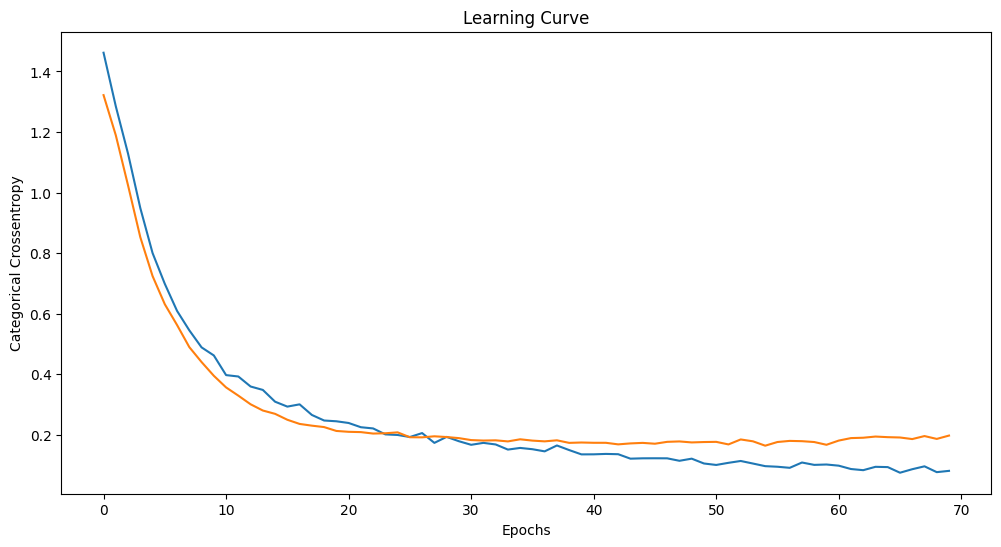

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()




# Model Evaluation

In [46]:
model.evaluate(xtrain,ytrain_cat)

50/50 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9850


[0.05618099123239517, 0.9850000143051147]

In [50]:
model.evaluate(xtest,ytest_cat)

13/13 [==============================] - 0s 6ms/step - loss: 0.1715 - accuracy: 0.9250


[0.17147038877010345, 0.925000011920929]

# Predict the results for train and test

In [51]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

13/13 [==============================] - 0s 5ms/step


In [52]:
yprob_train[0:5]

array([[1.90207102e-05, 9.50219691e-01, 4.97612096e-02, 2.42005721e-10],
       [8.73216389e-23, 1.44499438e-07, 8.91488969e-01, 1.08510956e-01],
       [9.86812651e-01, 1.31873181e-02, 5.53786270e-12, 3.05324012e-30],
       [1.67178795e-23, 2.85951374e-09, 4.21820842e-02, 9.57817852e-01],
       [5.29050769e-04, 9.98928010e-01, 5.42934169e-04, 5.96200826e-15]],
      dtype=float32)

In [54]:
yprob_test[0:5]

array([[9.9854118e-01, 1.4587505e-03, 4.2661323e-15, 1.4779570e-37],
       [2.5287161e-11, 8.9749731e-03, 9.9102461e-01, 4.6553171e-07],
       [7.9103606e-04, 9.9911785e-01, 9.1053858e-05, 8.8034285e-18],
       [1.4424343e-30, 4.7869580e-13, 6.1109744e-04, 9.9938899e-01],
       [1.6985921e-05, 9.9043292e-01, 9.5501086e-03, 3.1068915e-12]],
      dtype=float32)

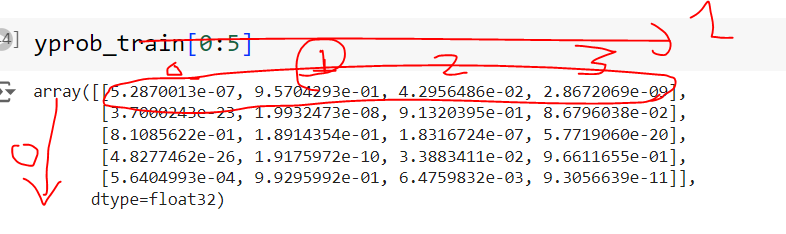

In [59]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test  =  np.argmax(yprob_test,axis=1)

In [60]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [61]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [62]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [63]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


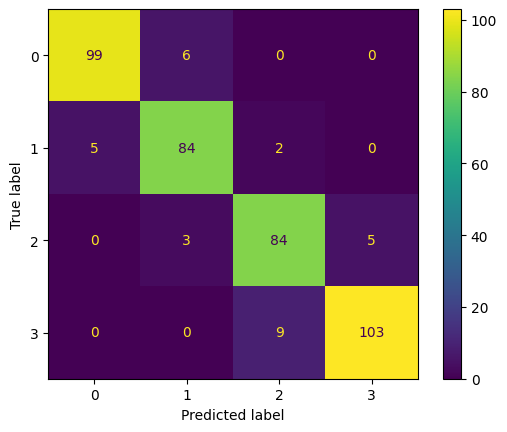

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)


In [67]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.90      0.92      0.91        91
           2       0.88      0.91      0.90        92
           3       0.95      0.92      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



# Because f1-macro is more than 0.8 hence model is a good model

# Out of Sample Predictions

In [68]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [69]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [70]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [71]:
probs = model.predict(xnew2_pre)

32/32 [==============================] - 0s 8ms/step


In [72]:
probs[0:5]

array([[3.9646314e-21, 9.3749378e-08, 7.3518354e-01, 2.6481640e-01],
       [1.5814320e-30, 2.1173397e-12, 4.5190845e-03, 9.9548095e-01],
       [1.2752885e-18, 3.0172807e-06, 9.8591930e-01, 1.4077608e-02],
       [2.2184780e-35, 3.0464876e-15, 1.2361411e-04, 9.9987650e-01],
       [2.1251946e-04, 9.9845546e-01, 1.3319253e-03, 2.7965484e-12]],
      dtype=float32)

In [101]:
preds = np.argmax(probs, axis=1)
preds[0:5]


array([2, 3, 2, 3, 1])

In [73]:
max_probs = np.max(probs, axis=1)

In [74]:
max_probs[0:5]

array([0.73518354, 0.99548095, 0.9859193 , 0.9998765 , 0.99845546],
      dtype=float32)

In [103]:
df_final= xnew[['id']]
df_final['price_range_pred'] = preds
df_final['prob'] = max_probs
df_final

,id,price_range_pred,prob
0,1,2,0.735184
1,2,3,0.995481
2,3,2,0.985919
3,4,3,0.999876
4,5,1,0.998455
...,...,...,...
995,996,2,0.960725
996,997,1,0.999489
997,998,1,0.726870
998,999,2,0.980724


In [104]:
df_final['price_range_pred'].value_counts()

price_range_pred
2    267
0    258
3    247
1    228
Name: count, dtype: int64

<Axes: xlabel='price_range_pred'>

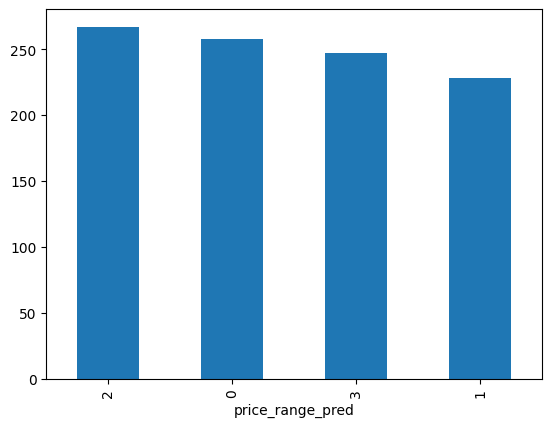

In [105]:
df_final['price_range_pred'].value_counts().plot(kind='bar')

In [106]:
df_final.to_csv('ResultsMobile.csv',index=False)